<a href="https://colab.research.google.com/github/sarankumar1325/NAVIGATELABSAI-ASSIGNMENT--2/blob/main/NAVIGATELABSAI_ASSIGNMENT_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING THE NECESSARY LIBRARIES**

In [2]:
!pip install pydotplus

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.7/278.7 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24551 sha256=27505f662e01793bc44a1231d4c18532702b0c41edd61d7b33b0d4c55b7eb426
  Stored in directory: /root/.cache/pip/wheels/69/b2/67/08f0eef649af92df772c09f451558298e07fab1bc7cdf33db0
Successfully built pydotplus


In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn import tree
from io import StringIO
from IPython.display import Image
import pydotplus
from sklearn.tree import export_graphviz

**DEFINE THE DATASET**

In [4]:
data = {
    'CGPA': ['>=9', '>=8', '>=9', '<8', '>=8', '>=9', '<8', '>=9', '>=8', '<8'],
    'Interactive': ['Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes'],
    'Practical Knowledge': ['Very good', 'Good', 'Average', 'Average', 'Good', 'Good', 'Good', 'Very good', 'Average', 'Good'],
    'Comm Skills': ['Good', 'Moderate', 'Poor', 'Good', 'Moderate', 'Moderate', 'Poor', 'Good', 'Good', 'Poor'],
    'Job Offer': ['Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No']
}

**CONVERT THE DATA INTO DATAFRAME**

In [5]:
df = pd.DataFrame(data)

**CONVERT THE NUMERICAL FEATURES INTO MUMERICAL FEATURES**

In [6]:
for col in df.columns:
    df[col] = pd.Categorical(df[col]).codes

**SPLIT THE FEATURES AND TARGET**

In [7]:
X = df.drop('Job Offer', axis=1)  # Features
y = df['Job Offer']               # Target

**SPLIT TRAINING AND TEST DATASET**

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**PARAMETER FOR GRIDSEARCH**

In [9]:
param_grid = {
    'max_depth': [3, 4, 5, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

**INITIALIZE  DECISION_TREE AND GRIDSEARCH**

In [12]:
clf = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

**FIT THE MODEL**

In [13]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, None],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

**GET THE BEST MODEL**

In [14]:
best_clf = grid_search.best_estimator_
print("Best parameters found by GridSearchCV:", grid_search.best_params_)

Best parameters found by GridSearchCV: {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}


**MAKE PREDICTIONS USING BEST MODEL**

In [15]:
y_pred = best_clf.predict(X_test)

**ACCURACY**

In [16]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Improved Accuracy: {accuracy:.2f}")

Improved Accuracy: 1.00


**CLASSIFICATION  REPORT**

In [18]:
unique_classes = y_test.unique()
if len(unique_classes) == 1:
    target_names = ['No'] if unique_classes[0] == 0 else ['Yes']
else:
    target_names = ['No', 'Yes']


print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

Classification Report:
              precision    recall  f1-score   support

         Yes       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



**VISUALISE THE TREE**

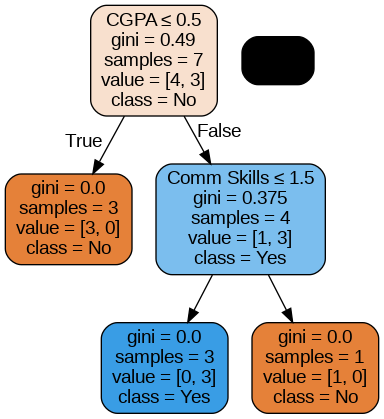

In [21]:
dot_data = StringIO()
export_graphviz(best_clf, out_file=dot_data, feature_names=['CGPA', 'Interactive', 'Practical Knowledge', 'Comm Skills'],
                class_names=['No', 'Yes'], filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())